In [1]:
print("all ok")

all ok


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mlt

In [3]:
df=pd.read_csv(r'../Datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,:2],df.iloc[:,2:],test_size=.2,random_state=27)

In [7]:
X_train.head()

,Age,EstimatedSalary
142,35,59000
264,48,90000
7,32,150000
23,45,22000
186,20,82000


In [8]:
Y_train.head()

,Purchased
142,0
264,1
7,1
23,1
186,0


In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [11]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-0.253954,-0.341064
1,0.990391,0.556377
2,-0.541111,2.293359
3,0.703234,-1.412203
4,-1.689737,0.324779


In [14]:
import numpy as np

In [15]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.7,70781.2
std,10.5,34596.8
min,18.0,15000.0
25%,29.0,43000.0
50%,37.0,71000.0
75%,46.0,88000.0
max,60.0,150000.0


In [16]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.3


Text(0.5, 1.0, 'after Scaling')

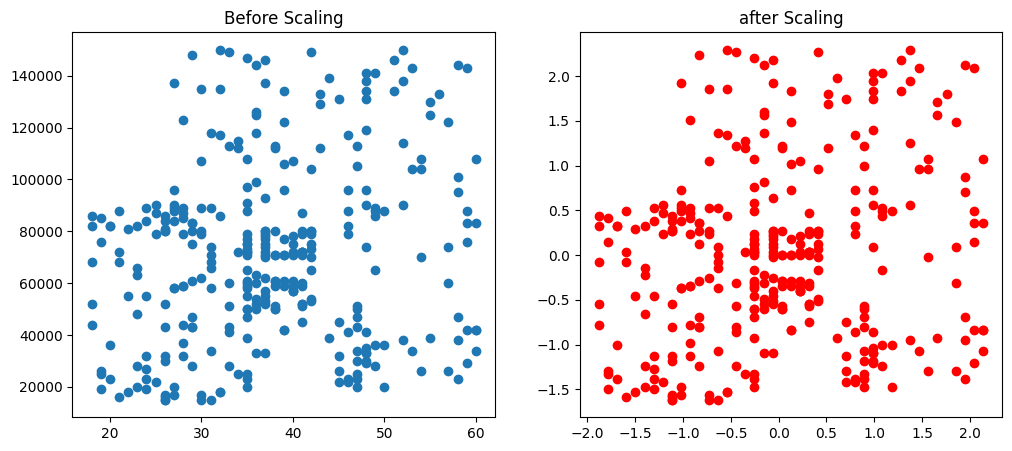

In [18]:
fig, (ax1,ax2)=mlt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color='red')
ax2.set_title("after Scaling")

Text(0.5, 1.0, 'after Scaling')

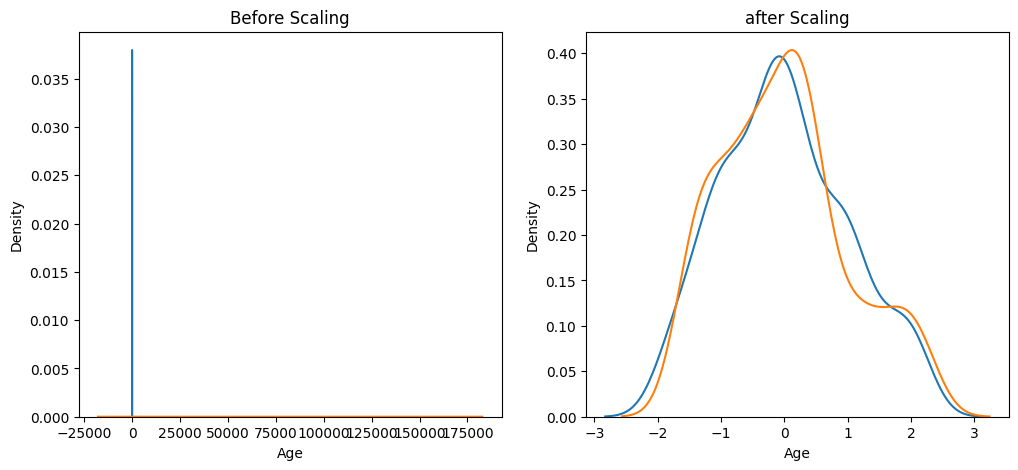

In [21]:
fig, (ax1,ax2)=mlt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(data=X_train,x='Age',ax=ax1)
sns.kdeplot(data=X_train,x='EstimatedSalary',ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(data=X_train_scaled,x='Age',ax=ax2)
sns.kdeplot(data=X_train_scaled,x='EstimatedSalary',ax=ax2)
ax2.set_title("after Scaling")

Text(0.5, 1.0, 'after Scaling of Age')

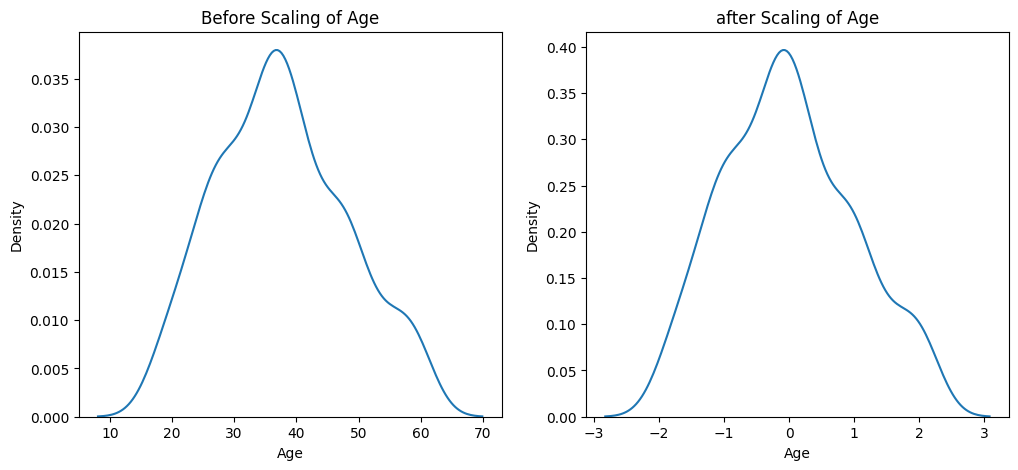

In [22]:
fig, (ax1,ax2)=mlt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(data=X_train,x='Age',ax=ax1)
ax1.set_title("Before Scaling of Age")

sns.kdeplot(data=X_train_scaled,x='Age',ax=ax2)
ax2.set_title("after Scaling of Age")

Text(0.5, 1.0, 'after Scaling of Salary')

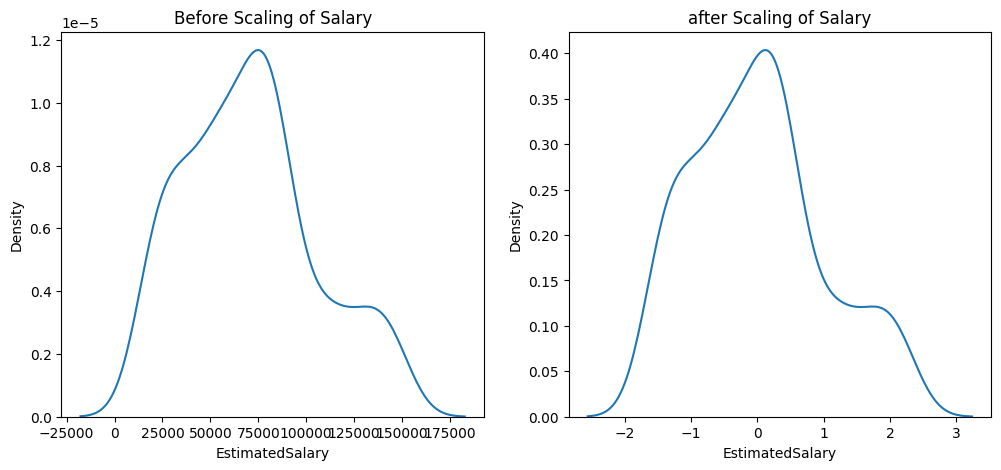

In [23]:
fig, (ax1,ax2)=mlt.subplots(ncols=2,figsize=(12,5))


sns.kdeplot(data=X_train,x='EstimatedSalary',ax=ax1)
ax1.set_title("Before Scaling of Salary")


sns.kdeplot(data=X_train_scaled,x='EstimatedSalary',ax=ax2)
ax2.set_title("after Scaling of Salary")

### Implement Raw and Scaled data in ML model

In [29]:
from sklearn.linear_model import LogisticRegression

lr_raw=LogisticRegression()
lr_scaled=LogisticRegression()

In [30]:
lr_raw.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_pred=lr_raw.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print("Raw data accuracy score:",accuracy_score(Y_test,y_pred))
print("Scaled data accuracy score:",accuracy_score(Y_test,y_pred_scaled))

Raw data accuracy score: 0.85
Scaled data accuracy score: 0.85


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_raw=KNeighborsClassifier()
knn_scaled=KNeighborsClassifier()

In [35]:
knn_raw.fit(X_train,Y_train)
knn_scaled.fit(X_train_scaled,Y_train)

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
y_pred=knn_raw.predict(X_test)
y_pred_scaled=knn_scaled.predict(X_test_scaled)

In [37]:
print("Raw data accuracy score:",accuracy_score(Y_test,y_pred))
print("Scaled data accuracy score:",accuracy_score(Y_test,y_pred_scaled))

Raw data accuracy score: 0.8
Scaled data accuracy score: 0.8875
